<a href="https://colab.research.google.com/github/ankitoscar/handsonml/blob/main/chapter_11/chapter_material.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Building an image classifier using the Sequential API 
Here, we will make an image classifier using keras' Sequential API. The image classifier would be made for the Fashion MNIST dataset which has 70,000 grayscales of different fashion items having size 28 x 28.

In [1]:
# Importing libraries 
import tensorflow as tf 
from tensorflow import keras 
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


In [2]:
# Loading the Fashion MNIST dataset 
fashion_mnist = keras.datasets.fashion_mnist # Utility function for loading 
                                             # common dataset 
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
                                            # Splitting data into train and test

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
# Shapes and datatype of dataset 
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [5]:
# Dividing the full training dataset to a train and valid set with scaling 
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255
                  # Dividing by 255 to scale the input 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
# Making labels list 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
class_names[y_train[0]] # Class of y_train[0]

'Coat'

In [7]:
# Making the neural network using Sequential API 
model = keras.models.Sequential() # Initialising the model 
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax')) # Output layer

In [8]:
# Summary of the model showing layers, types, trainable and non-trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compiling the model 
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

In [10]:
# Training and evaluating the model 
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.9870 - accuracy: 0.6840 - val_loss: 0.4933 - val_accuracy: 0.8332
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5049 - accuracy: 0.8273 - val_loss: 0.4918 - val_accuracy: 0.8238
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4490 - accuracy: 0.8431 - val_loss: 0.4144 - val_accuracy: 0.8606
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4171 - accuracy: 0.8539 - val_loss: 0.3983 - val_accuracy: 0.8634
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3935 - accuracy: 0.8621 - val_loss: 0.4047 - val_accuracy: 0.8560
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3778 - accuracy: 0.8651 - val_loss: 0.3835 - val_accuracy: 0.8644
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3634 - accuracy: 0.8724 - val_loss: 0.3630 - val_accuracy:

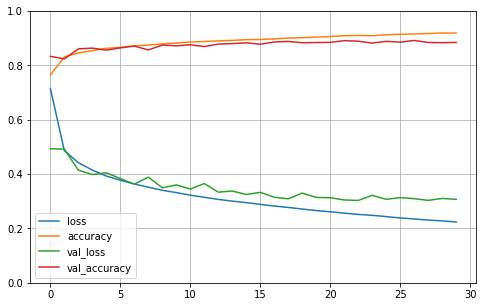

In [11]:
# Plotting the parameters of the trained model 

# Importing libraries 
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe of the history object 
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Set vertical range from 0-1
plt.show()

In [12]:
# Evaluating the model 
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 52.4129 - accuracy: 0.8624


[52.41288757324219, 0.8623999953269958]

The model has performed with an accuracy of 86% on the test set, which shows that the model is able to generalise easily.

In [20]:
# Predicting on data using the model 

# Importing numpy 
import numpy as np

print(model.predict(X_test[:3]))
y_pred = model.predict_classes(X_test[:3])
print(np.array(class_names)[y_pred])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
['Ankle Boot' 'Pullover' 'Trouser']


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
